In [1]:
credib_interval <- function(percent, shape1, shape2) {
    a <- (100-percent)/200
    b <- 1 - a
    return(qbeta(c(a,b), shape1, shape2))
}

# Exercise 1 - Bayesian Inference for Poisson model
A quality control engineer works at a factory that produces washing machines. The number of defective washing machines manufactured each day follows a Poisson distribution with an unknown rate parameter µ. 
The objective of the engineer is to estimate µ based on observed data and prior knowledge. 
Over the next 5 days, he observes the following number of defective products: x = (3, 0, 1, 5, 2).

(1) Assuming a positive uniform prior distribution for the parameter µ
- Determine and draw the posterior distribution for µ, given the data
- Evaluate mean, median and variance, both analytically and numerically in R

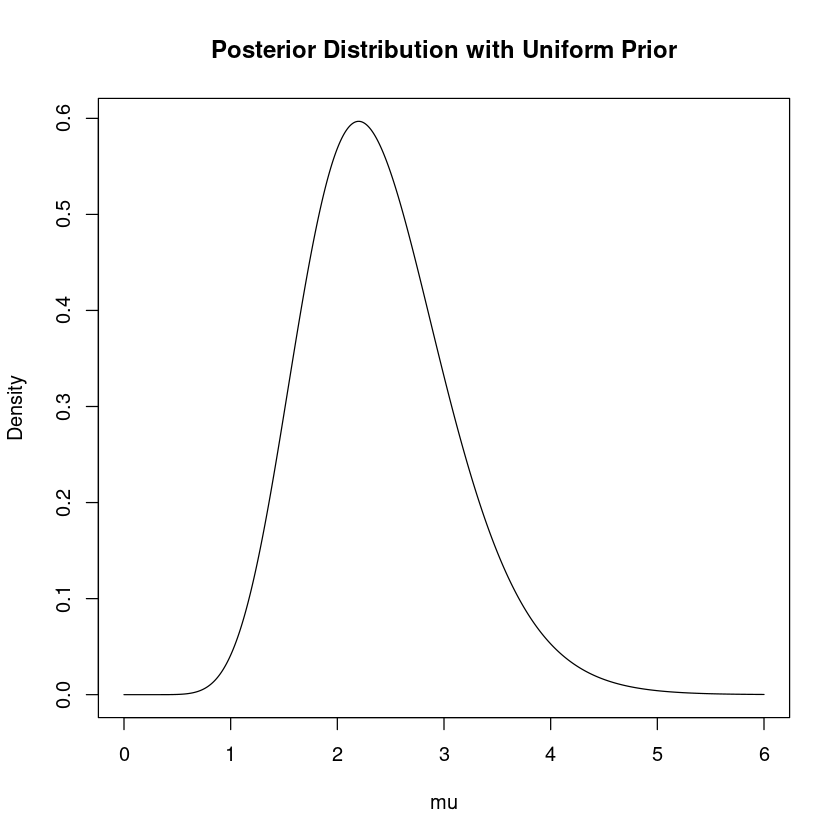

In [2]:
x <- c(3, 0, 1, 5, 2)

alpha1 <- sum(x) + 1
beta1 <- length(x)

x <- seq(0,6,length.out=1000)
plot(x, dgamma(x, alpha1, beta1), type="l",
     main = "Posterior Distribution with Uniform Prior", xlab = "mu", ylab = "Density"
)

In [3]:
# analytical solution for mean, median and variance
mean1 <- alpha1 / beta1
median1 <- qgamma(0.5, alpha1, beta1)
var1 <- alpha1 / beta1^2

cat("Analytical solution:\nMean", mean1, "\nMedian", median1, "\nVariance", var1)

# numerical solution for mean, median and variance
distrib <- rgamma(10000, alpha1, beta1)
mean2 <- mean(distrib)
median2 <- median(distrib)
var2 <- var(distrib)

cat("\n\nNumerical solution:\nMean", mean2, "\nMedian", median2, "\nVariance", var2)

Analytical solution:
Mean 2.4 
Median 2.333673 
Variance 0.48

Numerical solution:
Mean 2.415598 
Median 2.351377 
Variance 0.4887361

(2) Taking into account that historical data from similar factories suggest that the rate of defective washing machines is around 2 per day, with standard deviation of 1, model your belief using the suitable Gamma prior and then
- Determine and draw the posterior distribution for µ, given the data
- Evaluate mean, median and variance, both analytically and numerically in R.

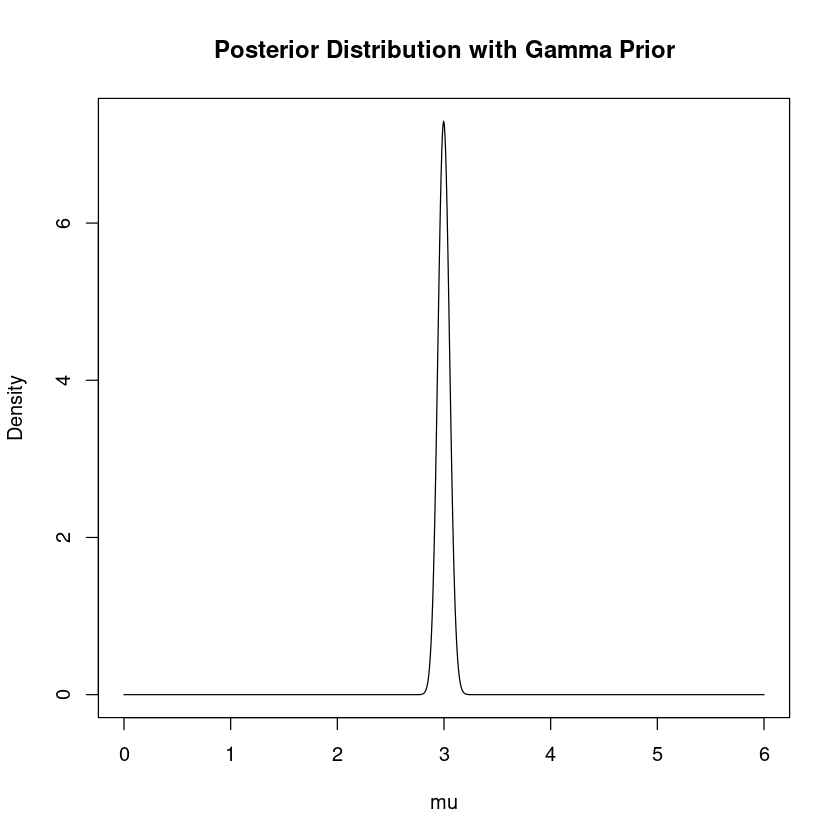

In [4]:
prior_mean <- 2
prior_sd <- 1
beta_prior <- prior_mean / prior_sd^2
alpha_prior <- prior_mean * beta_prior

alpha2 <- alpha_prior + sum(x)
beta2 <- beta_prior + length(x)

plot(x, dgamma(x, alpha2, beta2), type="l",
     main = "Posterior Distribution with Gamma Prior", xlab = "mu", ylab = "Density"
)

In [5]:
# analytical solution for mean, median and variance
mean1 <- alpha2 / beta2
median1 <- qgamma(0.5, alpha2, beta2)
var1 <- alpha2 / beta2^2

cat("Analytical solution:\nMean", mean1, "\nMedian", median1, "\nVariance", var1)

# numerical solution for mean, median and variance
distrib <- rgamma(10000, alpha2, beta2)
mean2 <- mean(distrib)
median2 <- median(distrib)
var2 <- var(distrib)

cat("\n\nNumerical solution:\nMean", mean2, "\nMedian", median2, "\nVariance", var2)

Analytical solution:
Mean 2.998004 
Median 2.997671 
Variance 0.00299202

Numerical solution:
Mean 2.997976 
Median 2.997785 
Variance 0.003020523

(3) Evaluate a 95% credibility interval for the results obtained with different priors (you can also try with other priors). In addition, compare the results obtained using Gamma posterior distribution with a normal approximation that matches the same mean and standard deviation.

In [6]:
ci1 <- credib_interval(95, alpha1, beta1)
ci2 <- credib_interval(95, alpha2, beta2)
cat("CI_1:", ci1, "\nCI_2:", ci2)

ci_norm <- qnorm(c(0.025, 0.975), mean=mean1, sd=sqrt(var1))
cat("\nCI_norm:", ci_norm)

CI_1: 0.4762292 0.88983 
CI_2: 0.7363487 0.7631654
CI_norm: 2.890795 3.105213

# Exercise 2 - Efficiency using Bayesian approach

A researcher A wants to evaluate the efficiency of detector 2 (Det2). 
For this purpose, he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1 and Det3. 
Let n be the number of signals recorded simultaneously by Det1 and Det3, and r be those also recorded by Det2, researcher A obtains n = 20 and r = 12.

Assuming a binomial model where n is the number of trials and r is the number of
success out of n trials,

(1) Evaluate the mean and the standard deviation using a Bayesian approach under the hypothesis of:
- uniform prior ∼ U(0, 1)
- Jeffrey’s prior ∼ Beta(1/2, 1/2)

In [7]:
nA <- 20
rA <- 12

unif_alpha <- 1 + rA
unif_beta <- 1 + nA - rA

unif_mean <- unif_alpha / (unif_alpha + unif_beta)
unif_sd <- sqrt(unif_alpha * unif_beta / ((unif_alpha + unif_beta)^2 * (unif_alpha + unif_beta + 1)))

cat("Unif. mean:", unif_mean, "\nUnif. SD:", unif_sd)

jeff_alpha <- 0.5 + rA
jeff_beta <- 0.5 + nA - rA

jeff_mean <- jeff_alpha / (jeff_alpha + jeff_beta)
jeff_sd <- sqrt(jeff_alpha * jeff_beta / ((jeff_alpha + jeff_beta)^2 * (jeff_alpha + jeff_beta + 1)))

cat("\nJeff. Mean:", unif_mean, "\nJeff. SD:", unif_sd)

Unif. mean: 0.5909091 
Unif. SD: 0.1025195
Jeff. Mean: 0.5909091 
Jeff. SD: 0.1025195

(2) Plot the posterior distributions for both cases

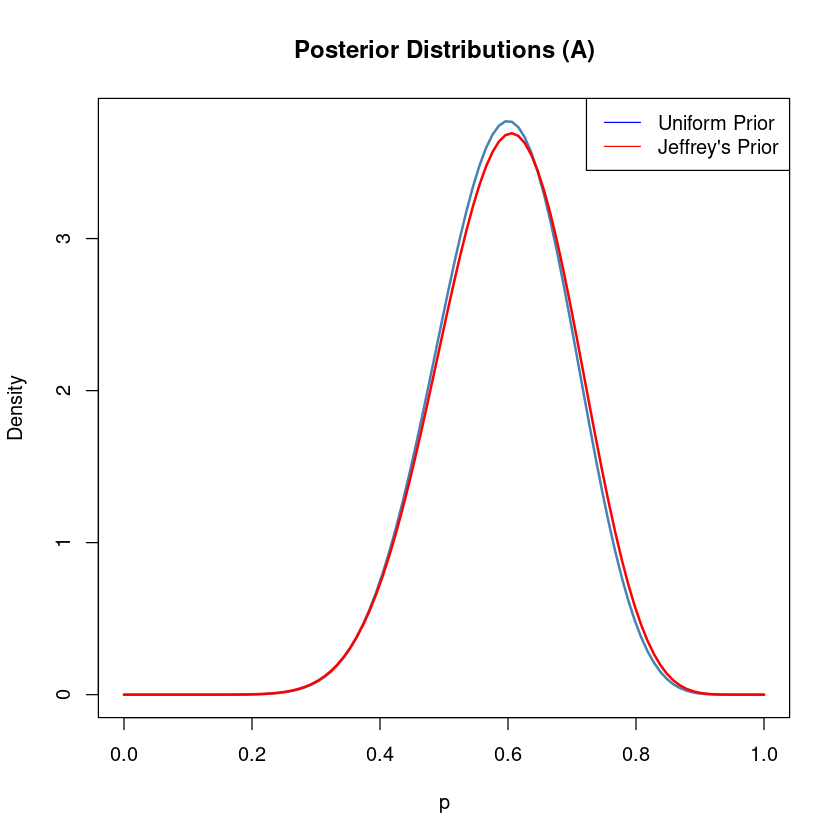

In [8]:
list_p <- seq(0, 1, length.out=100)
plot(list_p, dbeta(list_p, unif_alpha, unif_beta), 
     type = "l", col = "steelblue", lwd = 2,
     ylab = "Density", xlab = "p", 
     main = "Posterior Distributions (A)")
lines(list_p, dbeta(list_p, jeff_alpha, jeff_beta), col = "red", lwd = 2)
legend("topright", legend = c("Uniform Prior", "Jeffrey's Prior"), 
       col = c("blue", "red"), lty = 1)

Taking into account that the same detector has been studied by researcher B, who has performed only n = 10 measurements and has obtained r = 10 signals,

(3) Evaluate the mean, the standard deviation and the posterior distribution using a uniform prior with the results of researcher B.

Unif. mean: 0.9166667 
Unif. SD: 0.07665552

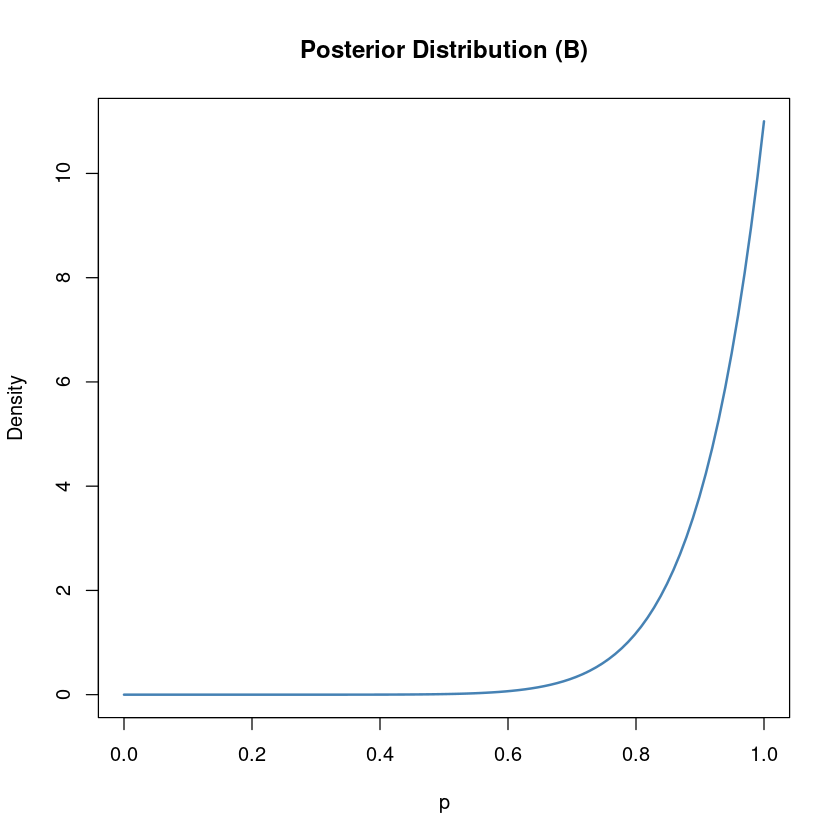

In [9]:
nB <- 10
rB <- 10

alphaB <- 1 + rB
betaB <- 1 + nB - rB

unif_mean <- alphaB / (alphaB + betaB)
unif_sd <- sqrt(alphaB * betaB / ((alphaB + betaB)^2 * (alphaB + betaB + 1)))

cat("Unif. mean:", unif_mean, "\nUnif. SD:", unif_sd)

plot(list_p, dbeta(list_p, alphaB, betaB), 
     type = "l", col = "steelblue", lwd = 2,
     ylab = "Density", xlab = "p", 
     main = "Posterior Distribution (B)")

(4) Repeat the computation of points (1) and (2) with the data of researcher A using as a prior the posterior obtained from point (3).

Unif. mean: 0.71875 
Unif. SD: 0.07826692

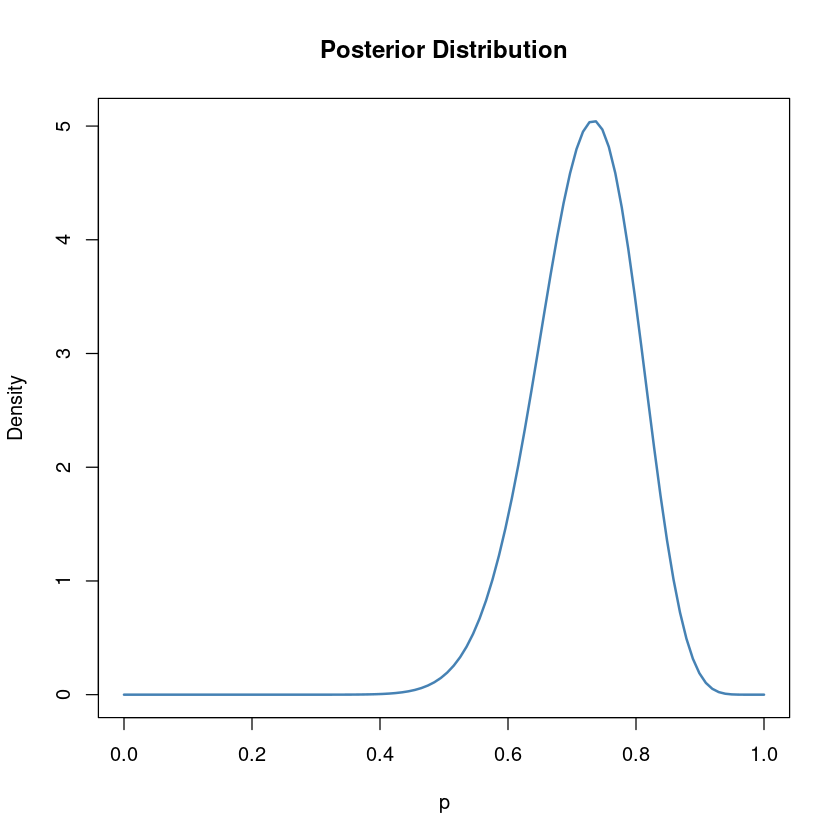

In [10]:
alpha_new <- alphaB + rA
beta_new <- betaB + nA - rA

unif_mean <- alpha_new / (alpha_new + beta_new)
unif_sd <- sqrt(alpha_new * beta_new / ((alpha_new + beta_new)^2 * (alpha_new + beta_new + 1)))

cat("Unif. mean:", unif_mean, "\nUnif. SD:", unif_sd)

plot(list_p, dbeta(list_p, alpha_new, beta_new), 
     type = "l", col = "steelblue", lwd = 2,
     ylab = "Density", xlab = "p",
     main = "Posterior Distribution")

(5) Compute 95% credible interval using the posterior of the previous point (4).

In [11]:
ci <- credib_interval(95, alpha_new, beta_new)
cat("Credible interval: [", ci[1], ", ", ci[2], "]", sep="")

Credible interval: [0.5538661, 0.8577715]

# Exercise 3 - Bayesian Inference for Binomial model
A coin is flipped n = 28 times with the following outcomes:\
```T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H```

(1) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

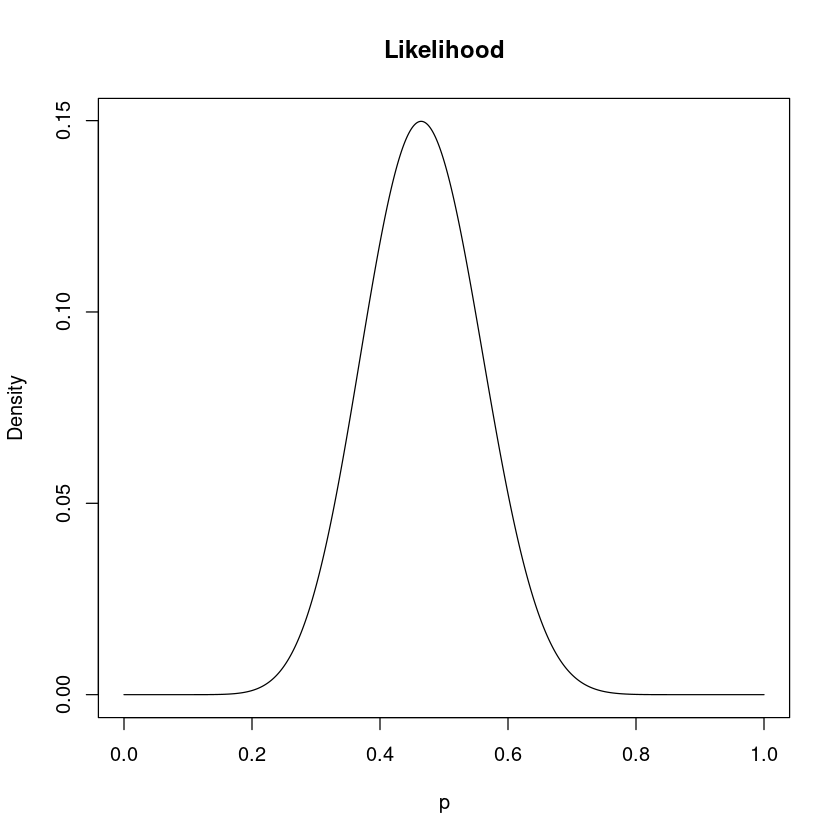

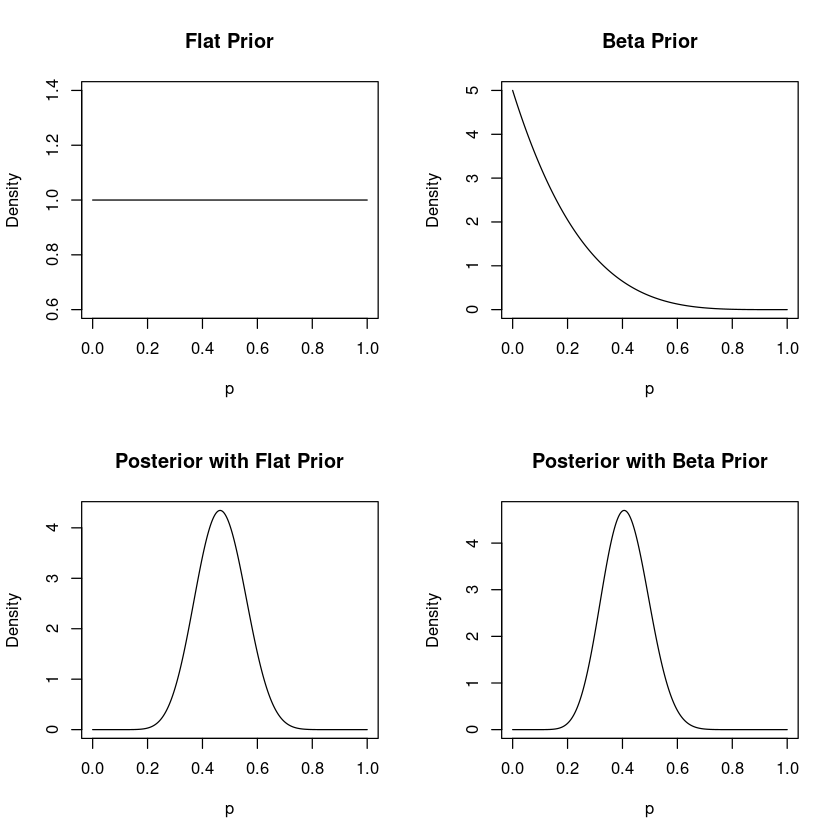

In [12]:
n <- 28
r <- 13 # heads

list_p <- seq(0, 1, length.out=1000)


# likelihood
plot(list_p, dbinom(r, n, list_p), type="l", 
     main="Likelihood", xlab="p", ylab="Density"
)

par(mfrow = c(2,2))

# flat prior
plot(list_p, dbeta(list_p, 1, 1), type="l",
     main="Flat Prior", xlab="p", ylab="Density"
)

# beta prior
alpha_prior <- 1; beta_prior <- 5
plot(list_p, dbeta(list_p, alpha_prior, beta_prior), type="l",
     main="Beta Prior", xlab="p", ylab="Density"
)

# flat posterior
plot(list_p, dbeta(list_p, 1+r, 1+(n-r)), type="l",
    xlab="p", ylab="Density", main="Posterior with Flat Prior"
)

# beta posterior
plot(list_p, dbeta(list_p, alpha_prior+r, beta_prior+(n-r)), 
     type="l", xlab="p", ylab="Density", 
     main="Posterior with Beta Prior"
)

(2) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [13]:
mode <- (alpha_prior + r - 1) / (alpha_prior + beta_prior + n - 2)
cat("Most probable value:", mode)

ci <- credib_interval(95, alpha_prior + r, beta_prior + n - r)
cat("\nCredible interval: [", ci[1], ", ", ci[2], "]", sep="")

Most probable value: 0.40625
Credible interval: [0.2547618, 0.5786063]

(3) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 28).

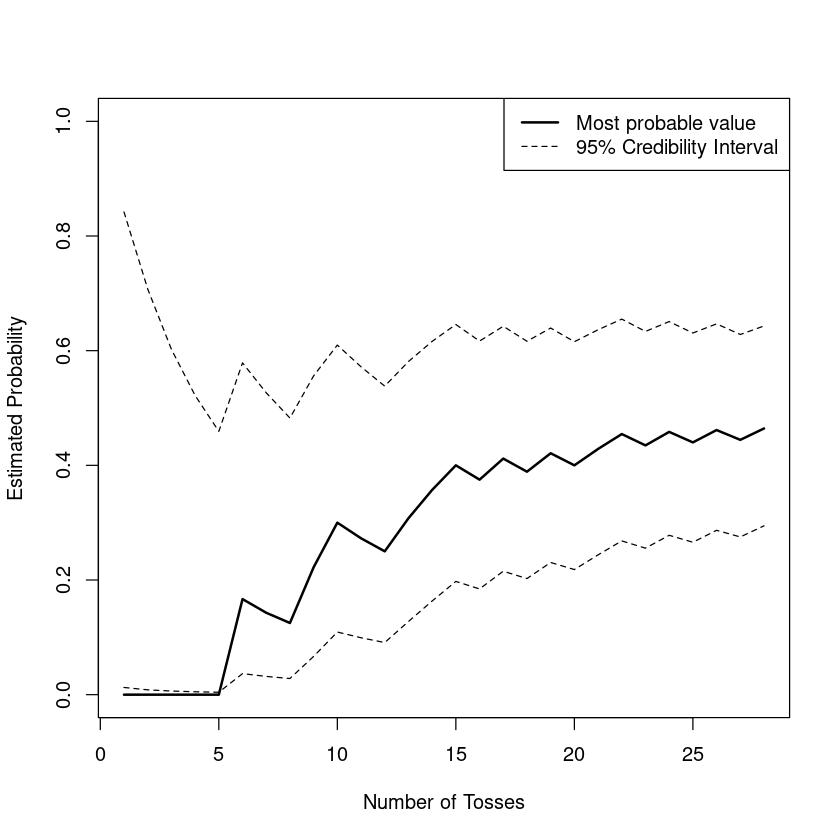

In [14]:
tosses <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H",
            "T", "T", "H", "H", "H", "T", "H", "T", "H", "T",
            "H", "H", "T", "H", "T", "H", "T", "H")
list_mode <- numeric(n)
list_ci_lower <- numeric(n)
list_ci_higher <- numeric(n)

for (i in 1:(length(tosses))) {
    h <- sum(tosses[1:i] == "H")
    t <- i - h
    
    a_post <- 1 + h
    b_post <- 1 + t
    
    list_mode[i] <- (a_post - 1) / (a_post + b_post - 2)
    ci <- credib_interval(95, a_post, b_post)
    list_ci_lower[i] <- ci[1]
    list_ci_higher[i] <- ci[2]
}

plot(1:n, list_mode, type="l",
     xlab="Number of Tosses", ylab="Estimated Probability",
     ylim=c(0,1), lwd=2
)
lines(1:n, list_ci_higher, lty=2)
lines(1:n, list_ci_lower, lty=2)

legend("topright", lty = c(1, 2), lwd=c(2,1),
       legend = c("Most probable value", "95% Credibility Interval"))

(4) Do you get a different result, by analysing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

In [15]:
one_step_value <- (1 + r - 1) / (n + 1 + 1 - 2)
one_step_ci <- credib_interval(95, 1 + r, 1 + n - r)
cat("One-step value:", one_step_value, "and CI:", one_step_ci)

sequentially_value <- list_mode[n]
sequentially_ci <- c(list_ci_lower[n], list_ci_higher[n])
cat("\nValue sequentially:", sequentially_value, "and CI:", sequentially_ci)

One-step value: 0.4642857 and CI: 0.2944856 0.6430613
Value sequentially: 0.4642857 and CI: 0.2944856 0.6430613

# Exercise 4 - Poll
A couple of days before an election in which four parties (A,B,C,D) compete, a poll is taken using a sample of 200 voters who express the following preferences 57, 31,45 and 67 for, respectively, parties A,B,C and D. Using a Bayesian approach, for all parties:\
Calculate the expected percentage of votes and a 68% credibility interval by assuming as prior a
- uniform prior
- a prior constructed from the results obtained from another poll conducted the previous week on a sample of 100 voters who expressed the following preferences 32,14,26,28 for, respectively, parties A,B,C and D.


Party A has mean: 0.2871287 and CI: 0.2554901 0.3187561
Party B has mean: 0.1584158 and CI: 0.132933 0.1838813
Party C has mean: 0.2277228 and CI: 0.1984137 0.2570177
Party D has mean: 0.3366337 and CI: 0.3035773 0.3696814

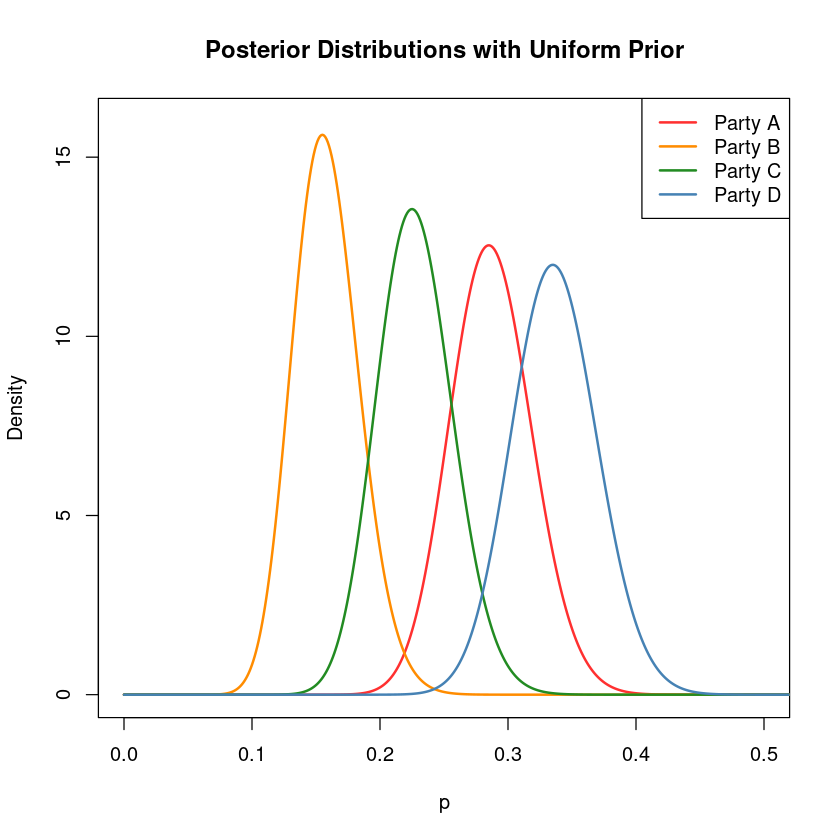

In [16]:
parties <- c("A", "B", "C", "D")
colors <- c("firebrick1", "darkorange", "forestgreen", "steelblue")
poll_data <- c(57, 31, 45, 67)
n_poll <- sum(poll_data)

# uniform prior
alpha <- 1 + poll_data
beta <- 1 + n_poll - poll_data
unif_mean <- alpha / (alpha + beta)

plot(numeric(0), numeric(0), type = "n", 
     xlim = c(0,.5), ylim = c(0,16),
     xlab = "p", ylab = "Density", 
     main = "Posterior Distributions with Uniform Prior"
)

for (i in 1:length(poll_data)) {
    lines(list_p, dbeta(list_p, alpha[i], beta[i]), col=colors[i], lwd=2)
    ci <- credib_interval(68, alpha[i], beta[i])
    cat("\nParty", parties[i], "has mean:", unif_mean[i], "and CI:", ci)
}
legend("topright", col = colors, lty = c(1,1,1,1), lwd = c(2,2,2,2),
       legend = c("Party A", "Party B", "Party C", "Party D")
)


Party A has mean: 0.2966667 and CI: 0.2704475 0.3228777
Party B has mean: 0.15 and CI: 0.1295357 0.1704506
Party C has mean: 0.2366667 and CI: 0.2122787 0.2610442
Party D has mean: 0.3166667 and CI: 0.2899639 0.3433621

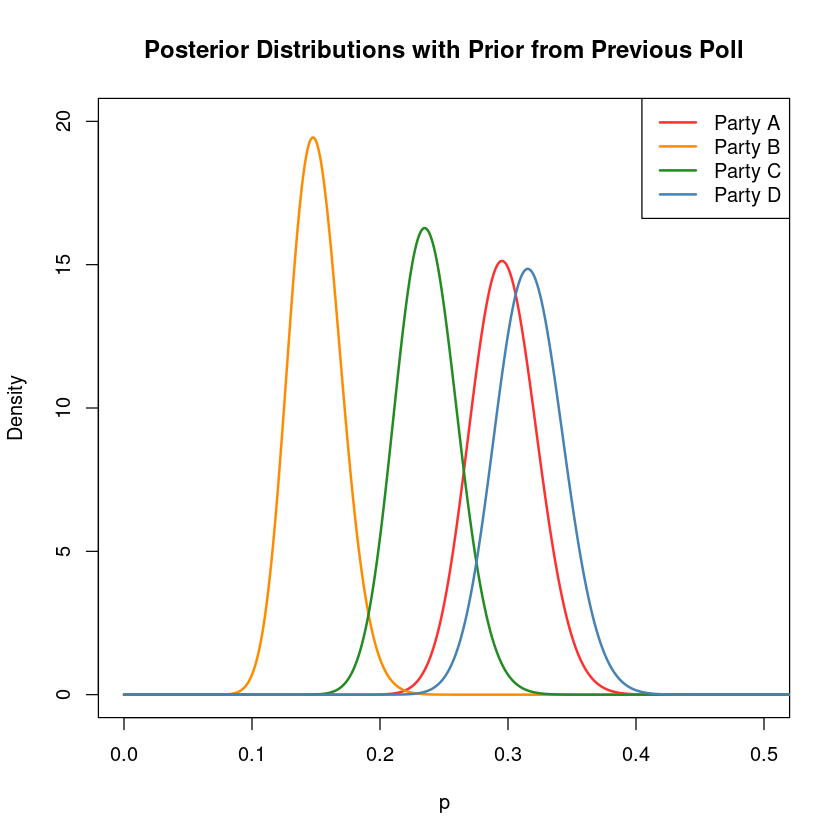

In [17]:
previous_poll_data <- c(32, 14, 26, 28)
previous_n_poll <- sum(previous_poll_data)

# prior from previous poll
alpha2 <- c()
beta2 <- c()
for (i in 1:length(previous_poll_data)) {
    alpha2 <- c(alpha2, previous_poll_data[i] + poll_data[i])
    beta2 <- c(beta2, sum(previous_poll_data[-i]) + sum(poll_data[-i]))
}
unif_mean2 <- alpha2 / (alpha2 + beta2)

plot(numeric(0), numeric(0), type = "n", 
     xlim = c(0,0.5), ylim = c(0,20),
     xlab = "p", ylab = "Density", 
     main = "Posterior Distributions with Prior from Previous Poll"
)

for (i in 1:length(poll_data)) {
    lines(list_p, dbeta(list_p, alpha2[i], beta2[i]), col=colors[i], lwd=2)
    ci <- credib_interval(68, alpha2[i], beta2[i])
    cat("\nParty", parties[i], "has mean:", unif_mean2[i], "and CI:", ci)
}
legend("topright", col = colors, lty = c(1,1,1,1), lwd = c(2,2,2,2),
       legend = c("Party A", "Party B", "Party C", "Party D")
      )